# Project Overview

In this project, I will be analyzing records of Olympic Swimming History from 1912 to 2020. My dataset is from Kaggle: https://www.kaggle.com/datasets/datasciencedonut/olympic-swimming-1912-to-2020. Some of the important information it contains that I will be exploring include the events at each Olympics, the athletes and their teams, the time results of the events, and the ranking results.

I chose this dataset to explore because I am a competitive swimmer and have grown up watching and analyzing these athletes and their times and records, so I thought it would be interesting to explore it from a more data science focused lens. 

### Analysis Goals:
As I am analyzing this dataset, I want to gauge the performance trends and levels of each country. This will include:
1) Analyzing the historical trends in medal wins for each country.
2) Analyzing the distribution of medals between male and female athletes for each country.

After analyzing these, I will do some data visualization, using graphs and plots to examine trends among our analyses. 

The final step will be to analyze whether there is a positive correlation between the year and the number of medals earned, and to see if more medals have been earned for countries in previous years versus older years.

# Section 1: Dataset

The dataset I chose was the OlympicSwimmingResults dataset, found from Kaggle. I chose it because I am a swimmer and am interested in analyzing swimming trends and the trends based on different countries. I found it because I previously knew of the Kaggle site and knew there were datasets I could find from there.

In [2]:
import pandas as pd

# first import the dataset
df = pd.read_csv("OlympicSwimmingResults.csv")
df

C:\Users\avapu\AppData\Local\Temp\ipykernel_45320\862281362.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4354,Stockholm,1912,4x100,Freestyle,1,Women,SWE,"Greta Carlsson, Vera Thulin, Sonja Johnsson, G...",NaN,5
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",00:10:11.200000,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",00:10:20.200000,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",00:10:28.600000,3


# Section 2: Exploratory Data Analysis

Some descriptive statistics that can help give a broad overview of the data include averages, standard deviation, and more. For the purposes of this project, I am going to rely on looking at the average of medals earned, to see if I can find a trend from earlier years to later years. This will be the average of medals earned per country.

I will be analzying the number of medals earned in total, and per gender.

Analyzing the historical trends in medal wins for each country:
1) First, we will group the data by year, team, and rank to count the number of medals won by each country in each year.

In [36]:
df_medal_wins = df.groupby(['Year', 'Team', 'Rank']).size().unstack(fill_value = 0)
df_medal_wins = df_medal_wins[[1, 2, 3]]
df_medal_wins['Total Medals'] = df_medal_wins.sum(axis = 1)
#df_medal_wins.reset_index(inplace = True)
df_medal_wins

Rank       1  2  3  Total Medals
Year Team                       
1912 ANZ   1  2  2             5
     AUS   1  0  0             1
     AUT   0  0  0             0
     BEL   0  0  0             0
     CAN   2  0  0             2
...       .. .. ..           ...
2020 SUI   0  0  2             2
     SWE   0  1  0             1
     TUN   1  0  0             1
     UKR   0  1  1             2
     USA   9  8  7            24

[613 rows x 4 columns]

We will also find the mean of the total medals earned, by year.

In [58]:
df_medal_wins = df.groupby(['Year', 'Team', 'Rank']).size().unstack(fill_value = 0)
df_medal_wins = df_medal_wins[[1, 2, 3]]
df_medal_wins['Total Medals'] = df_medal_wins.sum(axis = 1)
df_medal_mean = df_medal_wins.groupby(level = 0).mean()
df_medal_mean

Rank,1,2,3,Total Medals
Year,,,,
1912,0.571429,0.642857,0.642857,1.857143
1920,0.250000,0.583333,0.833333,1.666667
1924,0.578947,0.578947,0.578947,1.736842
1928,0.458333,0.458333,0.458333,1.375000
1932,0.733333,0.733333,0.733333,2.200000
1936,0.611111,0.611111,0.611111,1.833333
1948,0.687500,0.687500,0.687500,2.062500
1952,0.631579,0.526316,0.789474,1.947368
1956,0.700000,0.600000,0.650000,1.950000


Analyzing the distribution of medals between male and female athletes for each country:
1) First, we will group the data by year, team, and rank, but for each gender separately, to count the number of medals won by each country in each year for male and female athletes.

First, group the data for men.

In [37]:
df_male = df[df.Gender == 'Men']
df_male = df_male.groupby(['Year', 'Team', 'Rank']).size().unstack(fill_value = 0)
df_male = df_male[[1, 2, 3]]
df_male['Total'] = df_male.sum(axis = 1)
df_male

Rank       1  2  3  Total
Year Team                
1912 ANZ   0  1  2      3
     AUS   1  0  0      1
     AUT   0  0  0      0
     BEL   0  0  0      0
     CAN   2  0  0      2
...       .. .. ..    ...
2020 SUI   0  0  2      2
     SWE   0  0  0      0
     TUN   1  0  0      1
     UKR   0  1  1      2
     USA   6  2  2     10

[484 rows x 4 columns]

Next, group the data for women.

In [38]:
df_female = df[df.Gender == 'Women']
df_female = df_female.groupby(['Year', 'Team', 'Rank']).size().unstack(fill_value = 0)
df_female = df_female[[1, 2, 3]]
df_female['Total'] = df_female.sum(axis = 1)
df_female

Rank       1  2  3  Total
Year Team                
1912 ANZ   1  1  0      2
     AUT   0  0  0      0
     GBR   0  1  1      2
     GER   0  0  1      1
     NOR   0  0  0      0
...       .. .. ..    ...
2020 POL   0  0  0      0
     ROC   0  0  0      0
     RSA   1  1  0      2
     SWE   0  1  0      1
     USA   3  6  5     14

[431 rows x 4 columns]

Now, we're going to add the columns for total medals in both the men and women datasets back to the original total medals dataset.

In [41]:
df_medal_wins['Total Medals for Men'] = df_male['Total']
df_medal_wins['Total Medals for Women'] = df_female['Total']
df_medal_wins

Rank       1  2  3  Total Medals  Total Medals for Men  Total Medals for Women
Year Team                                                                     
1912 ANZ   1  2  2             5                   3.0                     2.0
     AUS   1  0  0             1                   1.0                     NaN
     AUT   0  0  0             0                   0.0                     0.0
     BEL   0  0  0             0                   0.0                     NaN
     CAN   2  0  0             2                   2.0                     NaN
...       .. .. ..           ...                   ...                     ...
2020 SUI   0  0  2             2                   2.0                     NaN
     SWE   0  1  0             1                   0.0                     1.0
     TUN   1  0  0             1                   1.0                     NaN
     UKR   0  1  1             2                   2.0                     NaN
     USA   9  8  7            24                  10.0                    14.0

[613 rows x 6 columns]

To clean our data, I will also replace the NaN values with the value of 0.

In [42]:
df_medal_wins.fillna(0, inplace = True)
df_medal_wins

Rank       1  2  3  Total Medals  Total Medals for Men  Total Medals for Women
Year Team                                                                     
1912 ANZ   1  2  2             5                   3.0                     2.0
     AUS   1  0  0             1                   1.0                     0.0
     AUT   0  0  0             0                   0.0                     0.0
     BEL   0  0  0             0                   0.0                     0.0
     CAN   2  0  0             2                   2.0                     0.0
...       .. .. ..           ...                   ...                     ...
2020 SUI   0  0  2             2                   2.0                     0.0
     SWE   0  1  0             1                   0.0                     1.0
     TUN   1  0  0             1                   1.0                     0.0
     UKR   0  1  1             2                   2.0                     0.0
     USA   9  8  7            24                  10.0                    14.0

[613 rows x 6 columns]

We will also find the mean of the total medals earned, by year.

In [60]:
df_male_mean = df_male.groupby(level = 0).mean()
df_male_mean

Rank,1,2,3,Total
Year,,,,
1912,0.500000,0.500000,0.500000,1.500000
1920,0.181818,0.545455,0.727273,1.454545
1924,0.461538,0.461538,0.461538,1.384615
1928,0.400000,0.400000,0.400000,1.200000
1932,0.545455,0.545455,0.545455,1.636364
1936,0.461538,0.461538,0.461538,1.384615
1948,0.461538,0.461538,0.461538,1.384615
1952,0.500000,0.357143,0.428571,1.285714
1956,0.437500,0.437500,0.437500,1.312500


In [61]:
df_female_mean = df_female.groupby(level = 0).mean()
df_female_mean

Rank,1,2,3,Total
Year,,,,
1912,0.166667,0.333333,0.333333,0.833333
1920,0.250000,0.250000,0.500000,1.000000
1924,0.500000,0.500000,0.500000,1.500000
1928,0.357143,0.357143,0.357143,1.071429
1932,0.454545,0.454545,0.454545,1.363636
1936,0.384615,0.384615,0.384615,1.153846
1948,0.454545,0.454545,0.454545,1.363636
1952,0.384615,0.384615,0.692308,1.461538
1956,0.583333,0.416667,0.500000,1.500000


# Section 3: Exploratory Data Visualization
Now, we will create data visualizations based on our previous analyses.

First, let's create a bar plot of the overall medals earned per country.

We're first going to create bar plots specifically for the first year, 1912.

In [46]:
df_medal_wins_1912 = df_medal_wins.loc[1912]
df_medal_wins_1912

Rank,1,2,3,Total Medals,Total Medals for Men,Total Medals for Women
Team,,,,,,
ANZ,1,2,2,5,3.0,2.0
AUS,1,0,0,1,1.0,0.0
AUT,0,0,0,0,0.0,0.0
BEL,0,0,0,0,0.0,0.0
CAN,2,0,0,2,2.0,0.0
FRA,0,0,0,0,0.0,0.0
GBR,0,3,3,6,4.0,2.0
GER,2,2,3,7,6.0,1.0
HUN,0,0,0,0,0.0,0.0


<Axes: xlabel='Team', ylabel='Total Medals'>

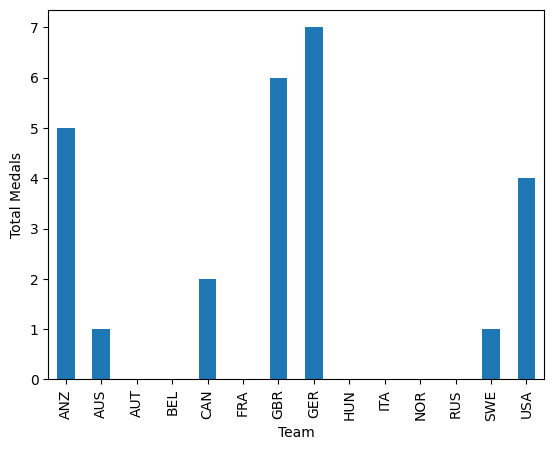

In [48]:
df_medal_wins_1912['Total Medals'].plot.bar(xlabel = 'Team', ylabel = 'Total Medals')

<Axes: xlabel='Team', ylabel='Total Medals'>

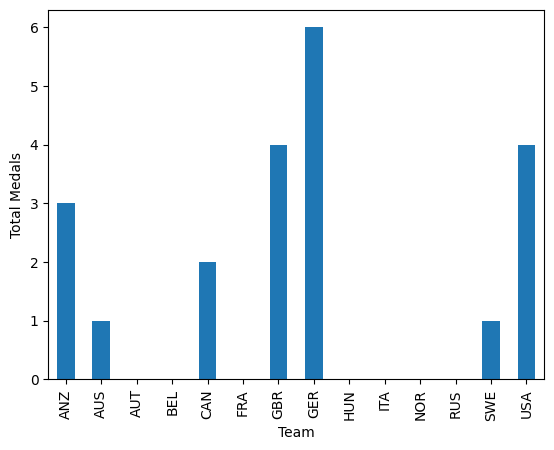

In [54]:
df_medal_wins_1912['Total Medals for Men'].plot.bar(xlabel = 'Team', ylabel = 'Total Medals')

<Axes: xlabel='Team', ylabel='Total Medals'>

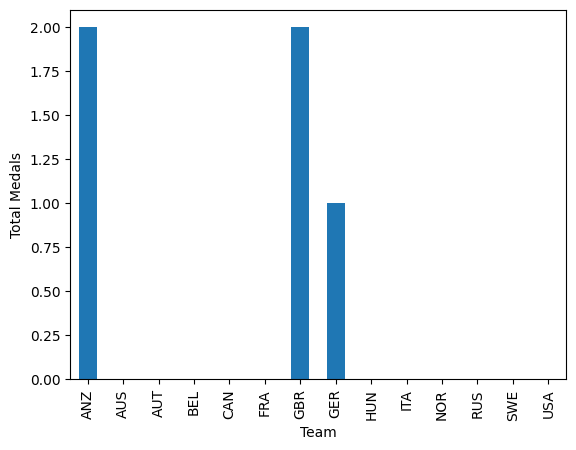

In [55]:
df_medal_wins_1912['Total Medals for Women'].plot.bar(xlabel = 'Team', ylabel = 'Total Medals')

Next, we're going to create bar plots for the most recent year, 2020.

In [49]:
df_medal_wins_2020 = df_medal_wins.loc[2020]
df_medal_wins_2020

Rank,1,2,3,Total Medals,Total Medals for Men,Total Medals for Women
Team,,,,,,
AUS,8,3,4,15,4.0,11.0
AUT,0,0,0,0,0.0,0.0
BEL,0,0,0,0,0.0,0.0
BLR,0,0,0,0,0.0,0.0
BRA,0,0,2,2,2.0,0.0
BUL,0,0,0,0,0.0,0.0
CAN,1,2,1,4,0.0,4.0
CHN,2,1,2,5,1.0,4.0
CZE,0,0,0,0,0.0,0.0


<Axes: xlabel='Team', ylabel='Total Medals'>

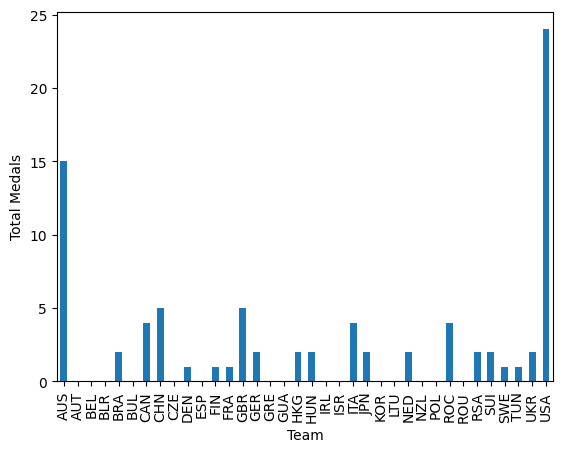

In [50]:
df_medal_wins_2020['Total Medals'].plot.bar(xlabel = 'Team', ylabel = 'Total Medals')

<Axes: xlabel='Team', ylabel='Total Medals'>

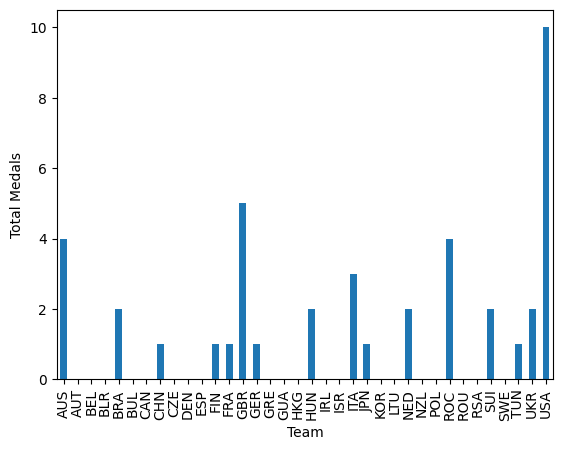

In [56]:
df_medal_wins_2020['Total Medals for Men'].plot.bar(xlabel = 'Team', ylabel = 'Total Medals')

<Axes: xlabel='Team', ylabel='Total Medals'>

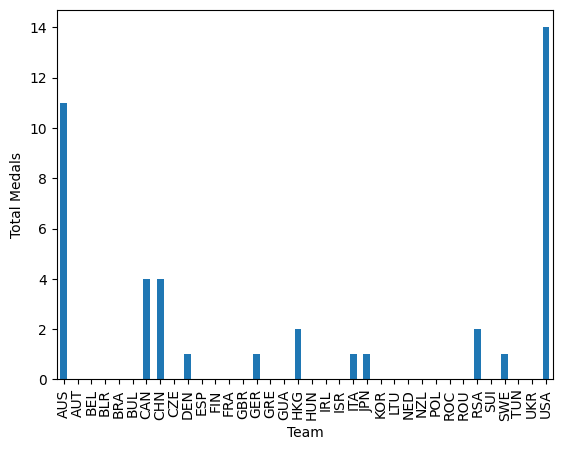

In [57]:
df_medal_wins_2020['Total Medals for Women'].plot.bar(xlabel = 'Team', ylabel = 'Total Medals')

Based on these plots, not only do we see that there are more countries competing in 2020 compared to 1912, but we can also see that the number of medals won is higher. From this, we can hypothesize that as the years increase, the number of medals won also increases. We want to see if this is true, so let's check whether there is a positive correlation between the year and the number of medals earned. 

# Section 4: Data Science
As previously stated, we want to see if the number of medals won increases as the year increases. So the question I have about this dataset is, is there a positive correlation between the year and the number of medals earned?

C:\Users\avapu\AppData\Local\Temp\ipykernel_45320\3988995919.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


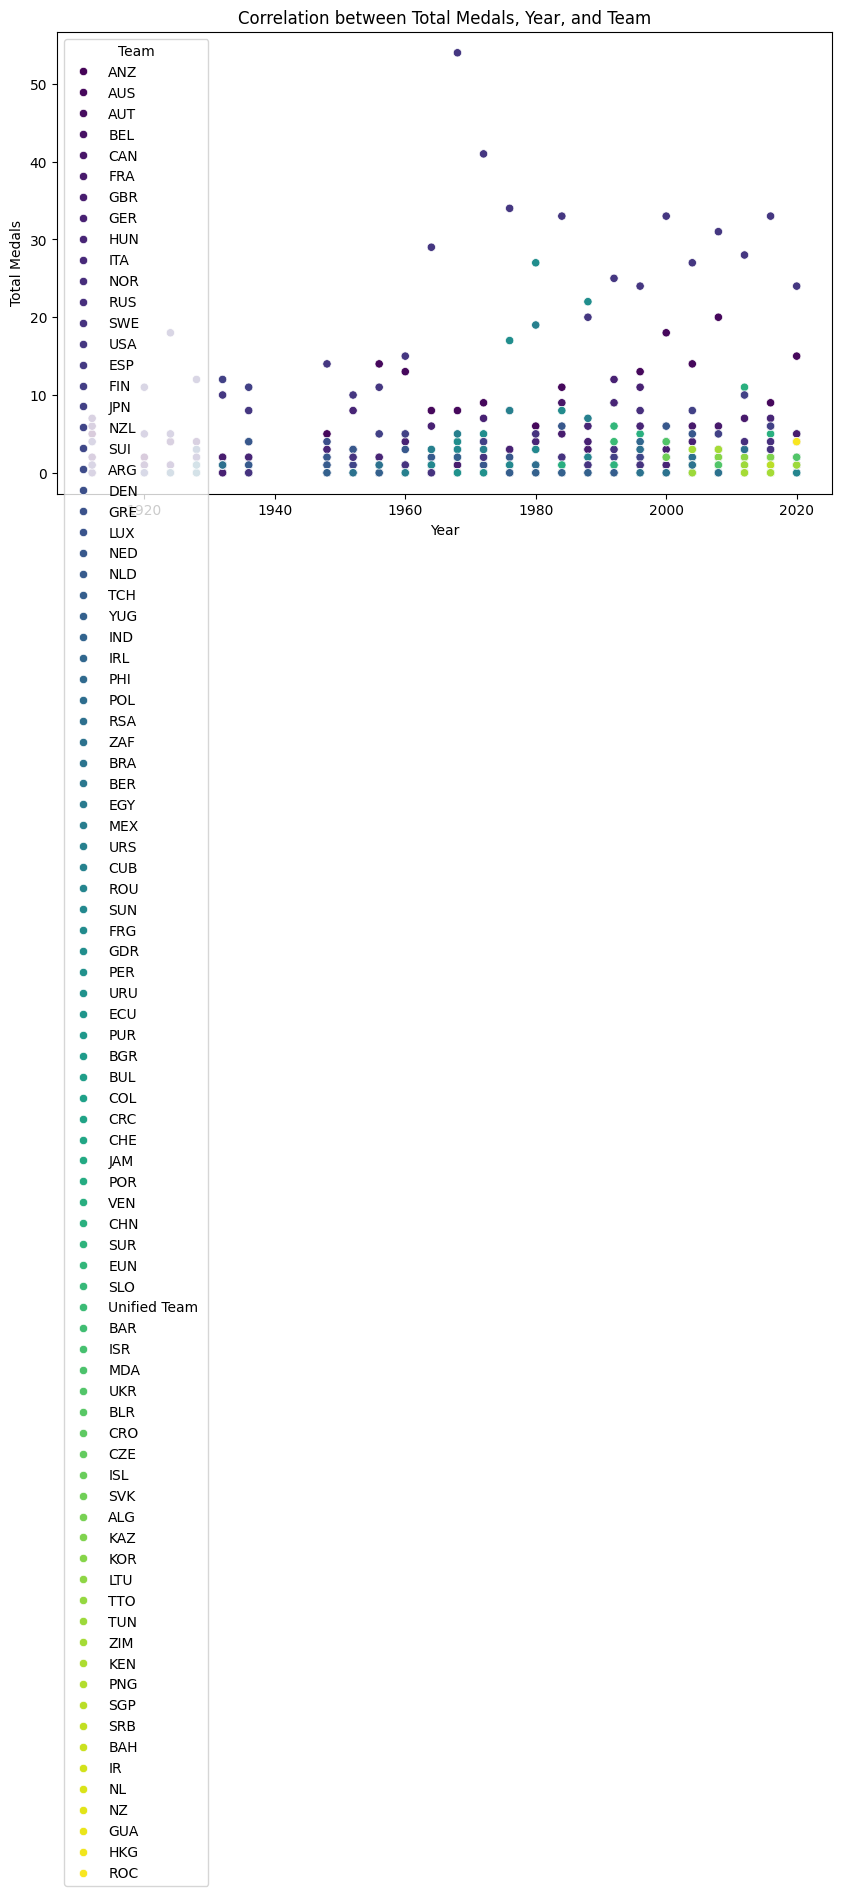

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

df_medal_wins.reset_index(inplace = True)
df_medal_wins['Years'] = df_medal_wins['Year'].astype('category').cat.codes
df_medal_wins['Teams'] = df_medal_wins['Team'].astype('category').cat.codes

# Create a scatter plot
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df_medal_wins, x='Year', y='Total Medals', hue='Team', palette='viridis', legend='full')  
plt.title('Correlation between Total Medals, Year, and Team') 
plt.xlabel('Year') 
plt.ylabel('Total Medals') 
#plt.xticks(range(len(df_medal_wins['Year'].unique())), df_medal_wins['Year'].unique(), rotation=45, ha='right') 
plt.tight_layout()  
plt.show()  

Based on our data plot, we can see that there isn't actually a very obvious positive correlation between year and number of medals earned. In general, there does seem to be a larger number of medals earned in later years as compared to earlier years, but as we saw that there were more countries participating in future years, the correlation may not necessarily be related to the year itself. Furthermore, we can see that the number of medals earned decreases for some countries and increases for others. This makes sense intuitively, because as some countries win more medals, it makes sense that others will win less medals, since there has to be those who win medals and those who don't in every event.

# Section 5: Overall Summary

Overall, to recap this project, I analyzed the trends in medal wins for each country, as well as the distribution of medals between male and female athletes for each country. To do this, I cleaned the datasets to focus on those medal distributions. Then, I visualized the data for each of these analyses that I worked on, but instead of visualizing the data for every single year for each country, I visualized the data specifically for the years of 1912 and 2020. I did this because, due to the sheer amount of datapoints, when I originally tried to visualize the data for each year for each country, the graph was barely legible. By changing the method to only plot 1912 and 2020 points, I was able to get a general idea and see if there was a general trend I could tell from two data points.

After doing this, I hypothesized a possible positive correlation between year and number of medals earned, and proceeded to graph the correlation between the two to see if my hypothesis was right. Based on my graph, I found that there was overall a rough positive trend, but it was not strong enough to determmine if the correlation was specifically due to the year and total medals, or if there were other factors. The correlation was also not strong enough to be sure of the correlation.

This was a fun project, as I was able to explore something I am interested in, and I was able to see the benefits and uses that data science exploration has in exploring data sets such as this one. Using the skills I learned throughout the semester, I was able to answer questions I had about the general trends of medal wins for different countries in Olympic swimming.